In [29]:
import sys
sys.path.append("../../../") # Where to find utilssphering
import utilssphering
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Read CSV
match_rep_df = pd.read_csv("../../../checkpoints/match_rep_df.csv")
match_rep_df

,Vendor,Batch,Assay_Plate_Barcode,sphering,value_95_replicating,Percent_Replicating,Plate_Map_Name,Modality,Images_per_well,Sites-SubSampled,...,simultaneous-excitation,sites,Size_MB,Size_MB_std,channel_names,brightfield_z_plane_used,feature_channels_found,Percent_Matching,value_95_matching,cell_count
0,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,True,0.191908,60.000000,JUMP-MOA_compound_platemap,Confocal,4,NaN,...,NaN,4,52.476334,0.000144,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.288099,2014937
1,MolDev,Scope1_MolDev_10X,Plate2_PCO_6ch_4site_10XPA,False,0.269727,53.333333,JUMP-MOA_compound_platemap,Confocal,4,NaN,...,NaN,4,52.476334,0.000144,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.320855,2014937
2,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,True,0.269617,62.222222,JUMP-MOA_compound_platemap,Confocal,4,NaN,...,NaN,4,52.476514,0.000183,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.398249,2413350
3,MolDev,Scope1_MolDev_10X,Plate3_PCO_6ch_4site_10XPA_Crest,False,0.329074,45.555556,JUMP-MOA_compound_platemap,Confocal,4,NaN,...,NaN,4,52.476514,0.000183,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",18.604651,0.389170,2413350
4,MolDev,Scope1_MolDev_10X_4siteZ,Plate3_PCO_6ch_4site_10XPA_Crestz,True,0.205121,66.666667,JUMP-MOA_compound_platemap,Confocal,4,NaN,...,NaN,4,52.476631,0.000142,"Actin, DNA, ER, Golgi, Mito, RNA",NaN,"Actin, DNA, ER, Golgi, Mito, RNA",23.255814,0.363114,2381443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,BRO0117059_20X,False,0.628379,20.000000,JUMP-MOA_compound_platemap,Confocal,9,4.0,...,4.0,4,7.954439,0.000583,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",6.976744,0.772160,489099
358,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,BRO01177034_20x,True,0.139090,56.666667,JUMP-MOA_compound_platemap,Confocal,9,4.0,...,1.0,4,8.003584,0.000014,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",18.604651,0.193171,452567
359,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_20X_6Ch_BRO0...,BRO01177034_20x,False,0.666818,21.111111,JUMP-MOA_compound_platemap,Confocal,9,4.0,...,1.0,4,8.003584,0.000014,"AGP, BrightField, DNA, ER, Mito, RNA",Z17,"AGP, BrightField, DNA, ER, Mito, RNA",9.302326,0.790813,452567
360,Yokogawa_US,4siteSubSample_Scope1_Yokogawa_US_40X_BRO0117059,BRO0117059_40x,True,0.193787,53.333333,JUMP-MOA_compound_platemap,Confocal,9,4.0,...,4.0,4,7.971628,0.080201,"AGP, BrightField, DNA, ER, Mito, RNA",Z08,"AGP, BrightField, DNA, ER, Mito, RNA",20.930233,0.234702,116595


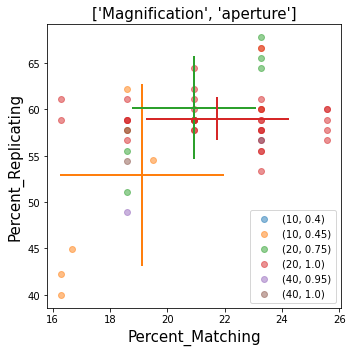

In [31]:
# 1

group = ["Magnification", "aperture"]

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) &
    (~match_rep_df["Batch"].str.contains("siteSub"))
                        ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))
utilssphering.group_plot(
    df=group_df,
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Percent_Matching",
    error_y="SD_Percent_Replicating",
    fig=fig,
    ax_=ax
)
utilssphering.group_plot(
    df_subset, 
    "Percent_Matching", 
    "Percent_Replicating", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True,
    alpha=0.5
    )



fig.savefig("(1)-rep-vs-match-mag_aperture.png", dpi=300)


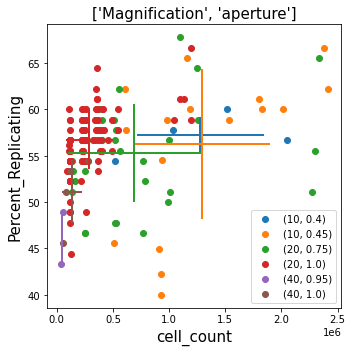

In [32]:
# 2

group = ["Magnification", "aperture"]

df_subset = match_rep_df[(match_rep_df["sphering"] == True)]

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}
group_df = utilssphering.find_group_avg_df(df_subset, group, add_cols=additional_cols)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=group_df, 
    x="Mean_Cell_Count", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Cell_Count",
    error_y="SD_Percent_Replicating",
    fig=fig,
    ax_=ax
)
utilssphering.group_plot(
    df_subset, 
    "cell_count", 
    "Percent_Replicating", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True)



fig.savefig("(2)-rep-vs-cell_count-mag_aperture.png", dpi=300)

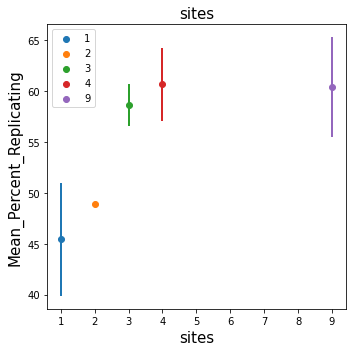

In [33]:
# 3

group = "sites"

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) &
    (~match_rep_df["Batch"].str.contains("siteSub"))
                        ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

# Plot the scatter
utilssphering.group_plot(
    df=group_df,
    x=group, 
    y="Mean_Percent_Replicating",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True
)
# Plot the errorbars
utilssphering.group_plot(
    df=group_df, 
    x=group, 
    y="Mean_Percent_Replicating",
    group=group,
    # error_x="SD_Percent_Replicating",
    error_y="SD_Percent_Replicating",
    fig=fig,
    ax_=ax
)

fig.savefig("(3)-rep-vs-sites.png", dpi=300)

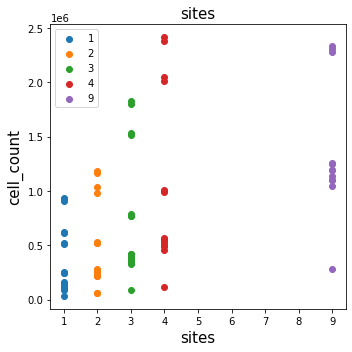

In [34]:
# 4

group = "sites"

df_subset = match_rep_df[
                        (match_rep_df["sphering"] == True) 
                        ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=df_subset,
    x=group, 
    y="cell_count",
    group=group,
    fig=fig,
    ax_=ax,
    legend=True
)

fig.savefig("(4)-cell_count-vs-sites.png", dpi=300)

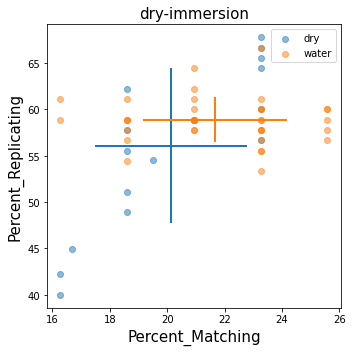

In [35]:
# 5

group = "dry-immersion"

df_subset = match_rep_df[
    (match_rep_df["sphering"] == True) &
    (~match_rep_df["Batch"].str.contains("siteSub")) 
    ]

group_df = utilssphering.find_group_avg_df(df_subset, group)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=group_df, 
    x="Mean_Percent_Matching", 
    y="Mean_Percent_Replicating",
    group=group,
    error_x="SD_Percent_Matching",
    error_y="SD_Percent_Replicating",
    fig=fig,
    ax_=ax
)
utilssphering.group_plot(
    df_subset, 
    "Percent_Matching", 
    "Percent_Replicating", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True,
    alpha=0.5
    )

fig.savefig("(5)-dry-vs-immersion-objective", dpi=300)

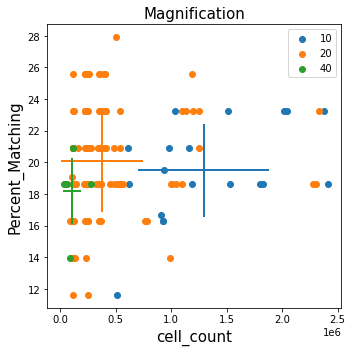

In [36]:
group = "Magnification"

df_subset = match_rep_df[(match_rep_df["sphering"] == True)]

additional_cols = {
    "col1": ["cell_count", "Mean_Cell_Count", lambda x: np.mean(x)],
    "col2": ["cell_count", "SD_Cell_Count", lambda z: float('%.3f'%np.std(z))]
}
group_df = utilssphering.find_group_avg_df(df_subset, group, add_cols=additional_cols)

fig, ax = plt.subplots(figsize=(5,5))

utilssphering.group_plot(
    df=group_df, 
    x="Mean_Cell_Count", 
    y="Mean_Percent_Matching",
    group=group,
    error_x="SD_Cell_Count",
    error_y="SD_Percent_Matching",
    fig=fig,
    ax_=ax
)
utilssphering.group_plot(
    df_subset, 
    "cell_count", 
    "Percent_Matching", 
    group=group, 
    fig=fig, 
    ax_=ax, 
    legend=True)


fig.savefig("(6)-match-vs-cell_count-mag.png", dpi=300)

In [37]:
d = {
    "k1": "true"
}

if d["k1"] == "true":
    print("hwserf")

hwserf


In [38]:
d = {
    "k1": "true"
}

l = [
   {
    "k2": "false"
    },
    {
    "k3": "true"
    } 
]

In [39]:
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope/profiles_original/Scope1_Yokogawa_US_40X_BRO0117059/BRO0117059_40x/BRO0117059_40x.csv.gz")
df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope/profiles_original/Scope1_Yokogawa_US_40X_BRO0117059/BRO0117059_40x/BRO0117059_40x.csv.gz")
[i for i in df.columns if "Metadata" in i]

['Metadata_Plate', 'Metadata_Well']

In [40]:
# df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope/profiles_original/Scope1_Yokogawa_US_40X_BRO0117059/BRO0117059_40x/BRO0117059_40x.csv.gz")


In [41]:
df = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope/profiles/2siteSubSample_Scope1_PE_Bin2_Confocal_1Plane/CPBroadPhenixC1PlaneP2/CPBroadPhenixC1PlaneP2_normalized_feature_select_negcon_batch.csv.gz")
[i for i in df.columns if "Metadata" in i]

['Metadata_broad_sample',
 'Metadata_solvent',
 'Metadata_Plate',
 'Metadata_Well',
 'Metadata_Site_Count',
 'Metadata_Count_Cells',
 'Metadata_Count_Cytoplasm',
 'Metadata_Count_Nuclei',
 'Metadata_Object_Count',
 'Metadata_InChIKey',
 'Metadata_pert_iname',
 'Metadata_pubchem_cid',
 'Metadata_moa',
 'Metadata_pert_type',
 'Metadata_control_type',
 'Metadata_smiles']

In [42]:
df2 = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope/profiles/Scope1_Yokogawa_US_40X_BRO0117059/BRO0117059_40x/BRO0117059_40x.csv.gz")
[i for i in df2.columns if "Metadata" in i]

['Metadata_Plate',
 'Metadata_Well',
 'Metadata_Site_Count',
 'Metadata_Count_Cells',
 'Metadata_Count_Cytoplasm',
 'Metadata_Count_Nuclei',
 'Metadata_Object_Count']

In [43]:
df3 = pd.read_csv("/Users/ctromans/image-analysis/jump_scope/jump-scope/profiles_original/1siteSubSample_Scope1_MolDev_10X_4siteZ/Plate3_PCO_6ch_4site_10XPA_Crestz/Plate3_PCO_6ch_4site_10XPA_Crestz.csv.gz")

[i for i in df3.columns if "Metadata" in i]

['Metadata_Plate',
 'Metadata_Well',
 'Metadata_Site_Count',
 'Metadata_Count_Cells',
 'Metadata_Count_CellsSmall',
 'Metadata_Count_Cytoplasm',
 'Metadata_Count_CytoplasmSmall',
 'Metadata_Count_Nuclei',
 'Metadata_Count_NucleiSmall',
 'Metadata_Object_Count']